In [ ]:
#
#
#
#

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from  datetime import datetime, date, time, timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
Measurement_cols = inspect(Measurement)
attr_names = [c_attr.key for c_attr in Measurement_cols.mapper.column_attrs]
print(attr_names )

['id', 'station', 'date', 'prcp', 'tobs']


In [33]:
station_cols= inspect(Station)
attr_names = [c_attr.key for c_attr in station_cols.mapper.column_attrs]
print(attr_names )

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']


In [36]:
query = session.query(Station)

Station = pd.read_sql(query.statement, engine)
Station.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

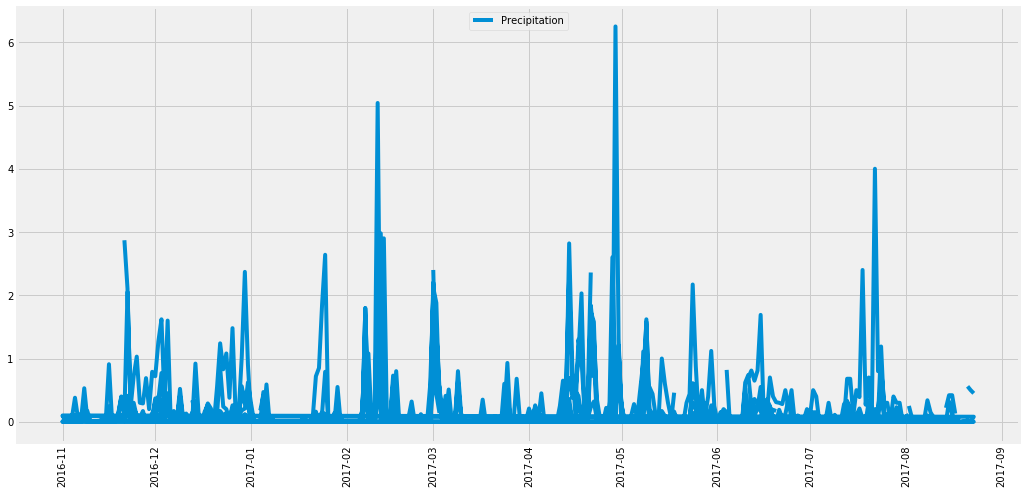

In [12]:
import matplotlib.pyplot as plt

months_prcp_df = pd.read_sql(sql = session.query(Measurement).with_entities(Measurement.id,
                                        Measurement.station,
                                        Measurement.date,
                                        Measurement.prcp,
                                        Measurement.tobs,
                                        
                                                                           ).statement, con = session.bind)  

yr_ago  = datetime.now() - timedelta(days=2*365)
yr_ago = yr_ago.strftime("%Y-%m-%e")

months_prcp_df['date'] = pd.to_datetime(months_prcp_df['date'])
months_prcp_df = months_prcp_df[months_prcp_df['date']>yr_ago]  

# Perform a query to retrieve the data and precipitation scores
x = months_prcp_df['date']
y = months_prcp_df['prcp'] 
plt.plot(x,y)
# Save the query results as a Pandas DataFrame and set the index to the date column
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(16,8)
plt.legend(['Precipitation'],loc='upper center')
plt.show()
# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates


![precipitation](Images/precipitation.png)

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
months_prcp_df.describe()


,id,prcp,tobs,latitude
count,16047.000000,14544.000000,16047.000000,16047.000000
mean,10189.660684,0.164790,73.847448,21.393826
std,5613.238620,0.432443,4.704562,0.081501
min,2434.000000,0.000000,58.000000,21.271600
25%,5315.000000,0.000000,71.000000,21.333100
50%,8947.000000,0.010000,74.000000,21.393400
75%,14794.000000,0.120000,77.000000,21.451670
max,19550.000000,6.250000,87.000000,21.521300


In [14]:
# How many stations are available in this dataset? 7
months_prcp_df['station'].nunique()

7

In [15]:
months_prcp_df.head()

,id,station,date,prcp,tobs,latitude
21897,2434,USC00519397,2016-11-01,0.0,77.0,21.2716
21898,2434,USC00519397,2016-11-01,0.0,77.0,21.4234
21899,2434,USC00519397,2016-11-01,0.0,77.0,21.5213
21900,2434,USC00519397,2016-11-01,0.0,77.0,21.3934
21901,2434,USC00519397,2016-11-01,0.0,77.0,21.4992


In [16]:
# What are the most active stations?
# List the stations and the counts in descending order.
group = months_prcp_df[['station', 'id']].groupby(['station']).agg(['count'])
group.columns = ['count']
group.sort_values(by=['count'], ascending=[False])

,count
station,
USC00519397,2619
USC00519281,2538
USC00516128,2520
USC00513117,2457
USC00519523,2421
USC00514830,2223
USC00517948,1269


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
describe1  = months_prcp_df.loc[months_prcp_df['station']=='USC00519397']
describe1.describe()

,id,prcp,tobs,latitude
count,2619.00000,2619.000000,2619.000000,2619.000000
mean,2579.00000,0.045155,74.408935,21.393826
std,84.02001,0.193035,5.153082,0.081514
min,2434.00000,0.000000,60.000000,21.271600
25%,2506.00000,0.000000,71.000000,21.333100
50%,2579.00000,0.000000,75.000000,21.393400
75%,2652.00000,0.020000,79.000000,21.451670
max,2724.00000,2.620000,87.000000,21.521300


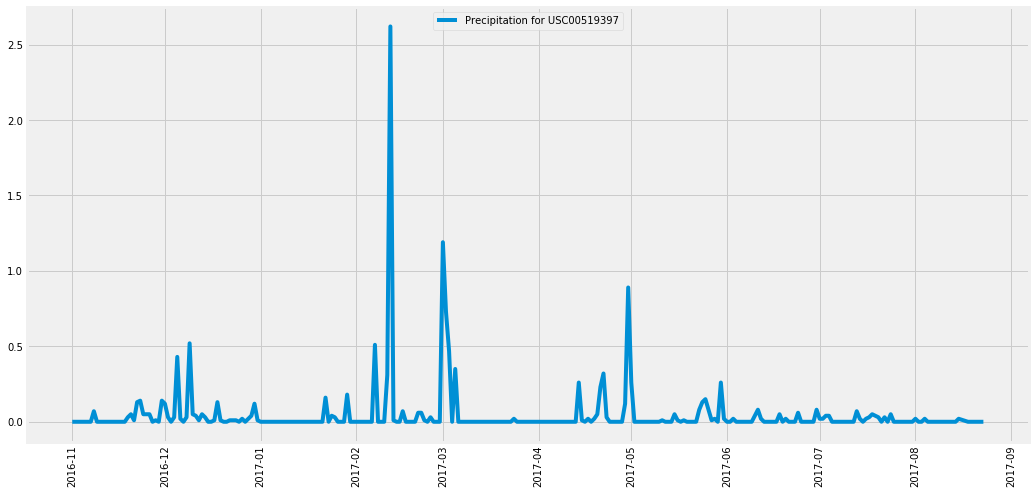

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months = describe1[describe1['date']>yr_ago]
twelve_months
x = twelve_months['date']
y = twelve_months['prcp'] 
plt.plot(x,y)
# Save the query results as a Pandas DataFrame and set the index to the date column
fig = plt.gcf()
plt.xticks(rotation=90)
fig.set_size_inches(16,8)
plt.legend(['Precipitation for USC00519397'],loc='upper center')
plt.show()

In [20]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    start_date  = datetime.strptime(start_date, "%Y-%m-%d")
    end_date = datetime.strptime( end_date, "%Y-%m-%d") 
    calc_temps_df = months_prcp_df[(months_prcp_df['date']>=start_date)&(months_prcp_df['date']<=end_date)]  
    calc_temps_df =pd.DataFrame(calc_temps_df) 
    return calc_temps_df.describe()
calc_temps('2012-02-28', '2018-03-05')

,id,prcp,tobs,latitude
count,16047.000000,14544.000000,16047.000000,16047.000000
mean,10189.660684,0.164790,73.847448,21.393826
std,5613.238620,0.432443,4.704562,0.081501
min,2434.000000,0.000000,58.000000,21.271600
25%,5315.000000,0.000000,71.000000,21.333100
50%,8947.000000,0.010000,74.000000,21.393400
75%,14794.000000,0.120000,77.000000,21.451670
max,19550.000000,6.250000,87.000000,21.521300


In [22]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
now = datetime.now()
now = now.strftime('%Y-%m-%d')
yr_ago  = datetime.now() - timedelta(days=365*1.5) #added .5 because there is not data for last year
yr_ago = yr_ago.strftime('%Y-%m-%d')
Avg_chart = calc_temps(yr_ago , now )
Avg_chart 

,id,prcp,tobs,latitude
count,5796.000000,5301.000000,5796.000000,5796.000000
mean,10382.135093,0.125433,77.318323,21.393826
std,5687.547598,0.298058,3.278705,0.081505
min,2616.000000,0.000000,66.000000,21.271600
25%,5394.750000,0.000000,75.000000,21.333100
50%,8997.500000,0.020000,78.000000,21.393400
75%,14905.250000,0.120000,80.000000,21.451670
max,19550.000000,4.000000,87.000000,21.521300


Text(0.5,1,'Trip Avg Temp')

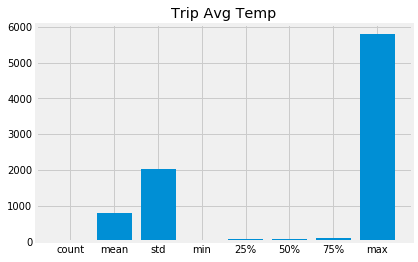

In [46]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
perc_summary = Avg_chart["tobs"].describe()
perc_summary  = pd.DataFrame(perc_summary )
y = perc_summary["tobs"]
x = perc_summary.index
plt.bar(x,y)
plt.title("Trip Avg Temp")

In [59]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
avg = months_prcp_df.groupby(['station']).mean()
avg = avg['tobs' ]
avg = pd.DataFrame(avg)
avg = avg.sort_values(by=['tobs'], ascending=False)
avg.head()

,tobs
station,
USC00514830,76.578947
USC00519523,76.360595
USC00519397,74.408935
USC00517948,73.695035
USC00513117,72.439560


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
